In [1]:
import numpy as np
from matplotlib.pyplot import *
from spectral import imshow, view_cube
import spectral.io.envi as envi 
from pysptools import spectro, noise 
%matplotlib widget

In [15]:
fpath = r'D:/Data/Data_HSI/CRAS/Specim/Refletancia/'
fname_wref = r'1 - Referencia Branco/conversion_output/post_processing/2024-02-28T12_42_59+0000_dark_current_compensation_radiometric_correction'
fname_dref = r'2 - Referencia Preto/conversion_output/post_processing/2024-02-28T12_52_00+0000_dark_current_compensation_radiometric_correction'
# fname_dref = r'3 - Vidro Verde/conversion_output/2024-02-28T12_53_51+0000_dark_frames'
fname_ref = r'6 -  Santo Antonio/conversion_output/post_processing/2024-02-28T12_58_07+0000_dark_current_compensation_radiometric_correction'

In [16]:
white_ref = envi.open(fpath + fname_wref + '.hdr', fpath + fname_wref + '.img')
dark_ref = envi.open(fpath + fname_dref + '.hdr', fpath + fname_dref + '.img')
data_ref = envi.open(fpath + fname_ref + '.hdr', fpath + fname_ref + '.img')

In [17]:
white_nparr = np.array(white_ref.load())
dark_nparr = np.array(dark_ref.load())
data_nparr = np.array(data_ref.load())

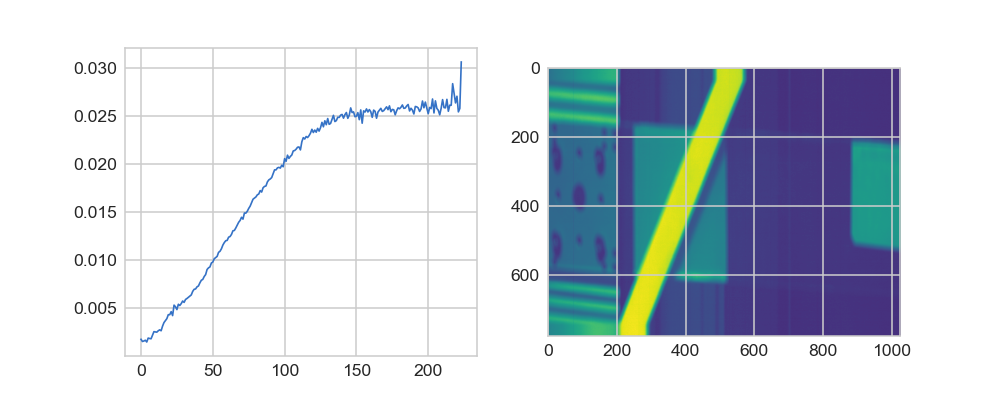

In [14]:
fig, ax = subplots(1, 2, figsize = (10, 4))

ax[0].plot(white_nparr[400, 400, :])
ax[1].imshow(white_nparr[:, :, 150])

In [41]:
mask_W = white_nparr[:, :, 50] > 450
ref_white = white_nparr[mask_W].mean(axis = 0)
mask_D = dark_nparr[:, :, 150] < 160
ref_dark = dark_nparr[mask_D].mean(axis = 0)

In [43]:
corrected_nparr = ((data_nparr - ref_dark)/(ref_white - ref_dark))[120:-70]

In [44]:
deny_bands = 10
ffs = noise.SavitzkyGolay().denoise_bands(corrected_nparr[:, :, deny_bands:], 7, 2)
ffs.shape

(569, 1024, 214)

In [45]:
exposure_time = 20e-3
specim_fps = 1/exposure_time
stage_speed = 5e-3
y_size = ffs.shape[0]/specim_fps*stage_speed * 1e2 #cm
x_size = 0.09*3 * 1e2 #cm

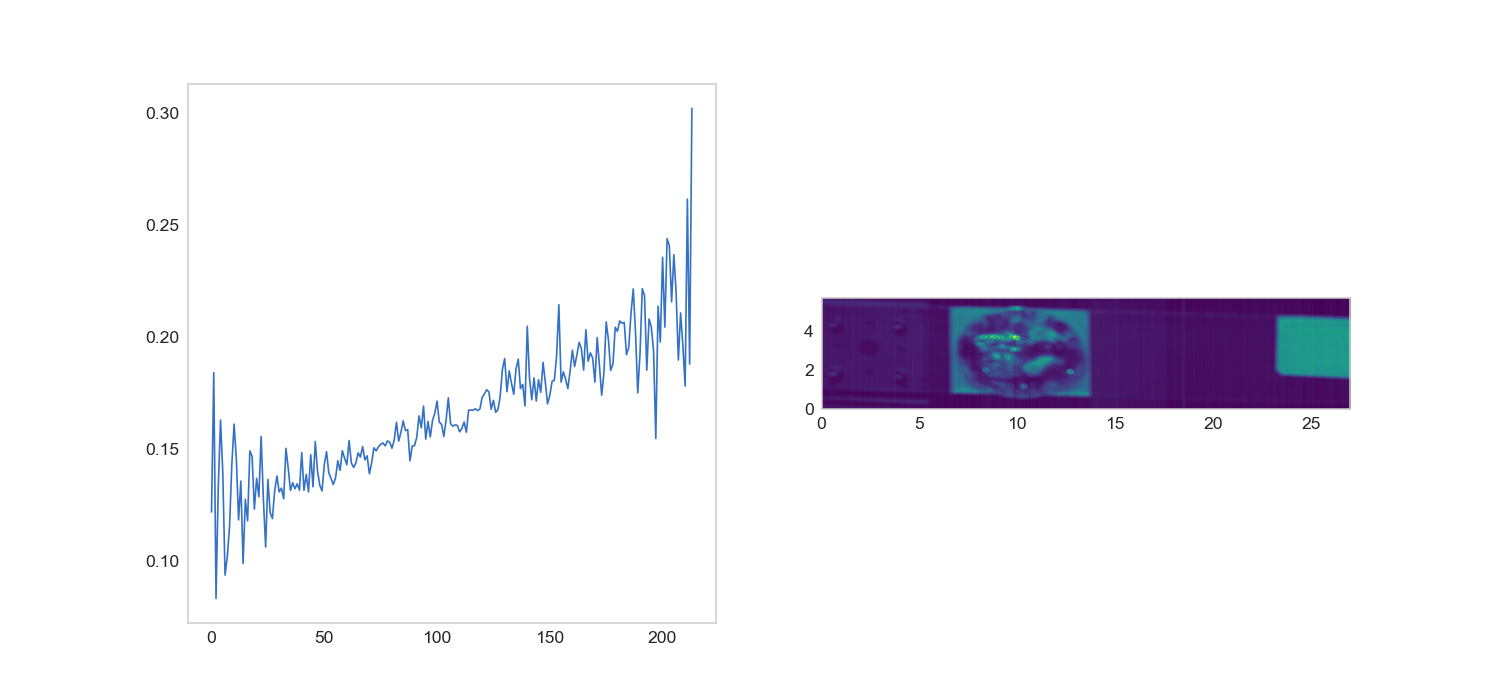

In [46]:
fig, ax = subplots(1, 2, figsize = (15, 7))

axs = ax[0]
axs.plot(ffs[394, 370])
axs.grid(False)

axs = ax[1]
wl = 100
axs.imshow(ffs[:, :, wl], extent = (0, x_size, 0, y_size))
axs.grid(False)

In [17]:
1/50e-3

20.0